#INTRO2ASTRO PLOTTING ASSIGNMENT
In this notebook we shall see how to plot data. Merely adding this notebook in the folder with the correct answers will mean submission of the assignment.

We first import the necessary libraries required for this notebook.

In [1]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

Note: Also don't forget to upload these files before running this notebook


1. to_end_core_h_burn
2. to_start_he_core_flash
3. to_end_core_he_burn
4. to_end_agb
5. to_wd
6. ndshm.dat



## Exercise 1(Solved,Warm up): Plotting the Hertzsprung-Russell diagram of a star

Note:This is an example of how to plot a graph, and this can be used as a reference on how to plot the actual exercises.

The Hertzsprung-Russell diagram is used to visualize a star's evolution, from it's beginning when it burns Hydrogen, to it's end, where it becomes anything from a dwarf star to a black hole depending on it's mass. In the plot below, we use the MESA software (Modules for Experiments in Stellar Astrophysics) to obtain data for a $1M_{\odot}$ star. If you want to know more about this software, you can check [here](https://docs.mesastar.org/en/latest/). From this data, we plot the log of effective temperature and log of luminosity at different stages of the star to see what is happening at different stages.

FileNotFoundError: [Errno 2] No such file or directory: 'to_end_core_h_burn'

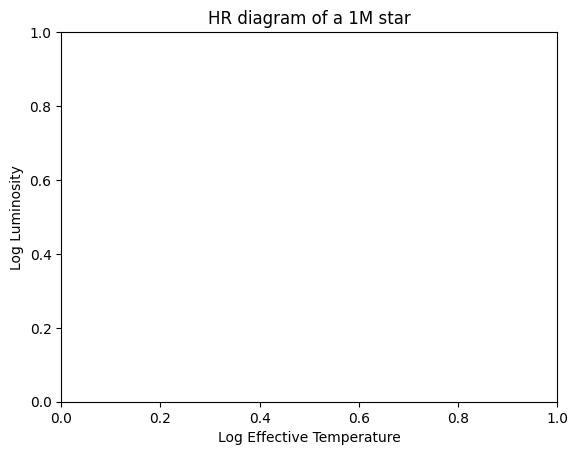

In [2]:
#Don't change anything in this cell
files=["to_end_core_h_burn","to_start_he_core_flash","to_end_core_he_burn","to_end_agb","to_wd"]
plt.title("HR diagram of a 1M star")
plt.xlabel("Log Effective Temperature")
plt.ylabel("Log Luminosity")
for i in files:
  teff,l=[],[]
  with open(i,'r') as file:
    for line in file:
      parts = line.split()
      teff.append(float(parts[0]))
      l.append(float(parts[1]))
  plt.plot(teff,l,label=i)
  plt.xlim(5,3.2)
  plt.legend()
plt.show()

## Exercise 2: Discrete Fourier Transform of a Noisy Signal

Not all signals come out to be clear and analyzable. Some signals will have too much noise to be even comprehendible. In such cases we use different techniques to reduce the noise in data. One such technique is the Discrete Fourier Transform (DFT). First let us have a look at the data.

In [3]:
#Don't change anything in this cell
filename='ndshm.dat'
#filepath=....(If there)
#filename=filepath+filename
time,amplitude=[],[]
with open(filename, 'r') as file:
    for line in file:
      parts = line.split()
      time.append(float(parts[0]))
      amplitude.append(float(parts[1]))
lent=len(time)

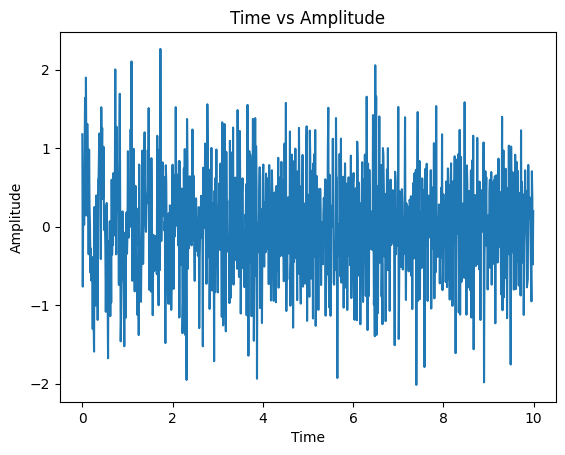

In [5]:
# Exercise 2a: Plot Time vs Amplitude, make sure to label the axis
import matplotlib.pyplot as plt

# Plot Time vs Amplitude
plt.plot(time, amplitude)

# Add labels
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Time vs Amplitude")

# Show the plot
plt.show()


We can see, we cannot comprehend anything from this data, as there is too much noise. So we filter out the noise. How you may ask? We use a technique called the Discrete Fourier transform, which will show us the same data in the frequency domain. The difference that will make will be clear when you look at the plot

Now we perform the Discrete Fourier Transform on the data provided, just run the below code to get the data. If you want to know more about this, read [this](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)

In [4]:
#Don't change anything in this cell
freq=time.copy()
for j in range(lent):
  freq[j]=(j-lent/2)/(lent*0.01)
famp=[]
fsq=[]
for j in range(lent):
  ft=0+0j
  for k in range(lent):
    ft=ft+amplitude[k]*cm.exp(2*np.pi*1j*(j-lent/2)*k/lent)
  famp.append(ft)
  fsq.append(np.abs(ft)**2)

Now the transformed data is in terms of Frequency vs Amplitude, now plot this and see the result for yourself

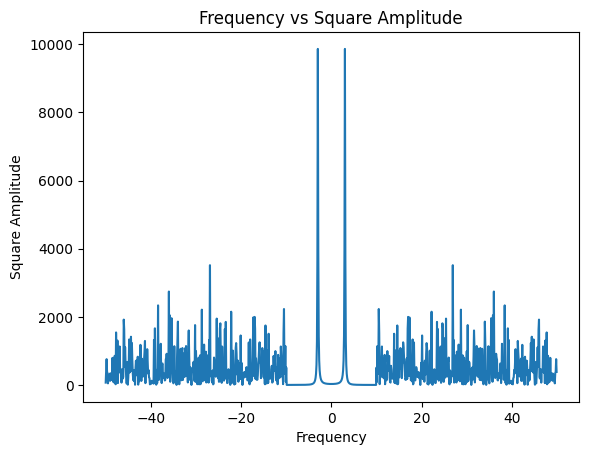

In [6]:
#Exercise 2b:Plot the frequency (freq variable) and square amplitude (fsq)
import matplotlib.pyplot as plt

# Plot Time vs Amplitude
plt.plot(freq, fsq)

# Add labels
plt.xlabel("Frequency")
plt.ylabel("Square Amplitude")
plt.title("Frequency vs Square Amplitude")

# Show the plot
plt.show()


As you can see, the centre two peaks were the required frequency and the noise is the rest, now we remove the noise and transform it back.

In [ ]:
#Don't change anything in this cell
for j in range(lent):
  if freq[j]<=-10 or freq[j] >=10:
    famp[j]=0
    fsq[j]=0

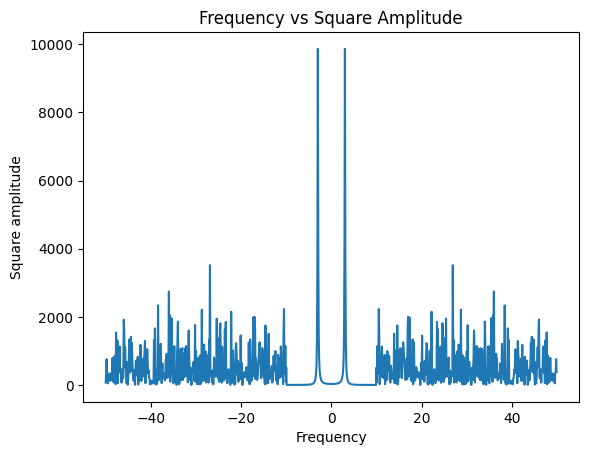

In [10]:
#Exercise 2c:Plot the frequency (freq variable) and square amplitude (fsq)
plt.plot(freq, fsq)
plt.xlabel("Frequency")
plt.ylabel("Square amplitude")
plt.title("Frequency vs Square Amplitude")

plt.show()

In [13]:
#Don't change anything in this cell
modamp = []
for k in range(lent):
    ft = 0
    for j in range(lent):
        ft=ft+famp[j]*cm.exp(-2j * np.pi * (j-lent/2) * k / lent)
    modamp.append(ft / lent)

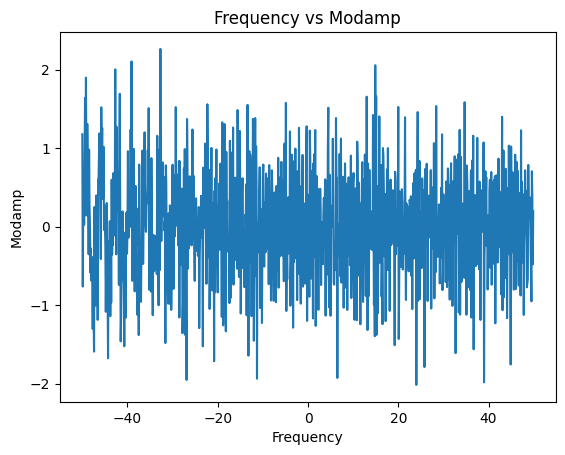

In [14]:
#Exercise 2d:Plot the time (freq variable) and modified amplitude (modamp)
plt.plot(freq,modamp)
plt.xlabel("Frequency")
plt.ylabel("Modamp")
plt.title("Frequency vs Modamp")
plt.show()

## Exercise 3: Plotting of Electric potential for different systems

In this exercise, we shall plot the electrical potential of different systems using the imshow function of matplotlib. Your job in the exercises is to identify the systems. It need not be a correct answer, this is just to understand your knowledge on electromagnetism. The plotting however, should be as accurate as possible.

## Poisson Solvers

Poisson solvers are codes used to solve the Poisson equation in electromagnetic theory.

$$∇^2Φ=-ρ$$

Where the $Φ$ gives you the potential of the system. There are many ways to solve this equation numerically, but in this excercise, we use the method of successive overrelaxation.The function used to evaluate for a 2D system is provided below. For more details on this, you can read [this file](https://en.wikipedia.org/wiki/Successive_over-relaxation).

In [15]:
#Don't change anything in this cell
def sorgspoisson(w,Pn,Rho,delx,dely):
  sum=0
  for i in range(Pn.shape[1]-1):
    for j in range(Pn.shape[0]-1):
      o=Pn[i,j]
      Pn[i,j]=(1-w)*Pn[i,j]+w*(((Pn[i+1][j]+Pn[i-1][j])/delx**2+(Pn[i][j+1]+Pn[i][j-1])/dely**2-Rho[i,j])/(2/delx**2+2/dely**2))

  sum=sum+(o-Pn[i,j])**2
  ne=np.sqrt(sum)
  return Pn,ne

Now run the below cell for system 1. Note that it will take a minute or two to run. So please be patient

In [16]:
#Don't change anything in this cell
#System 1
Rho=np.zeros((100,100))
P=np.zeros((100,100))
for i in range(25,75):
  Rho[25][i]=1
  Rho[75][i]=-1

T=1000
tol=1e-9

for i in range(T):
  P,ne=sorgspoisson(1.8,P,Rho,0.1,0.1)
  if (ne<tol):
    break

Now plot the potential obtained using either imshow or contour/countourf

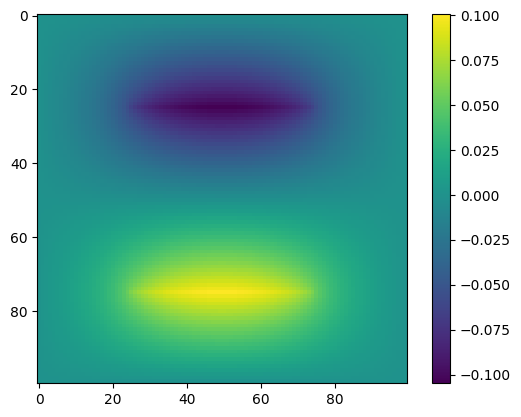

In [17]:
#3a) Plot the potential map given in P
import matplotlib.pyplot as plt

plt.imshow(P, cmap='viridis')
plt.colorbar()
plt.show()


Can you try guessing what system do you think it is?

In [ ]:
#Try to guess what system this is.
#Don't forget to put a Hashtag before your answer
#this looks like a electric dipole stretced into line charges.

Now run the second system. Again this will take a minute or two to run. So please be patient

In [18]:
#Don't change anything in this cell
#System 2
Rho=np.zeros((100,100))
P=np.zeros((100,100))
Rho[45][50]=1
Rho[65][50]=-1
T=100
tol=1e-9
for i in range(T):
  P,ne=sorgspoisson(1.8,P,Rho,1,1)
  if (ne<tol):
    break

Again plot the potential obtained

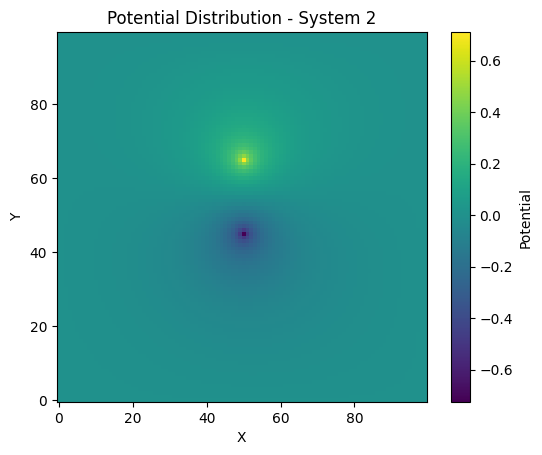

In [19]:
#3b) Plot the potential map given in P

plt.imshow(P, cmap='viridis', origin='lower')
plt.colorbar(label="Potential")
plt.title("Potential Distribution - System 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Try guessing what system this is

In [20]:
#Try to guess what system this is.
#Don't forget to put a Hashtag before your answer
#This is a 2D electric dipole system — a positive and a negative point charge separated along the vertical axis.

Made with love by A R Bathri Narayanan